# Introduction

Our analysis are aimed to deploy different approaches for Machine learning models, Prediction models for diagnosis and prognosis on benign or malignant tumor of Breast Cancer.

# Import main packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Load data set

In [2]:
##BC=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv") (Code à ecrire sur kaggle !)
BC=pd.read_csv("BreastCancer.csv",index_col='id')


# Visualisation of the data set

In [3]:
BC.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

# Data type

In [4]:
BC.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Correlation matrix

<AxesSubplot:>

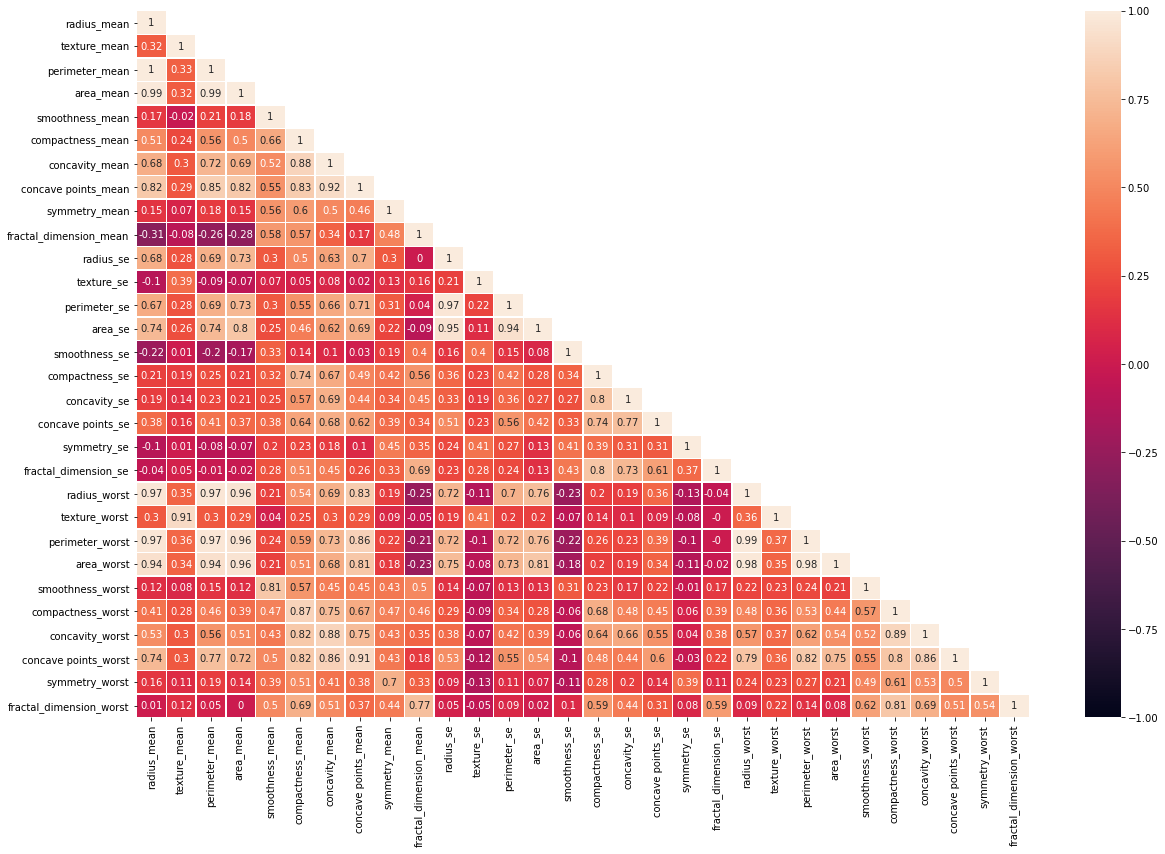

In [5]:
plt.subplots(figsize=(20,13))
# creating mask 
df_lt = BC.corr().where(np.tril(np.ones(BC.corr().shape)).astype(np.bool))
sns.heatmap(round(df_lt,2),linewidths=.5,vmin=-1,vmax=1,annot=True)

# Data visualisation


## Histogram

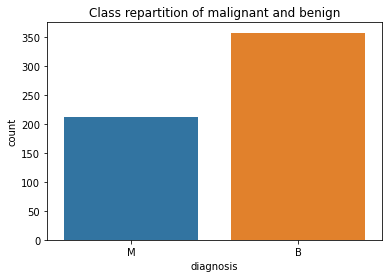

In [6]:
g = sns.countplot(x ="diagnosis",data=BC)
g.set_title("Class repartition of malignant and benign")
plt.show()

## Boxplots

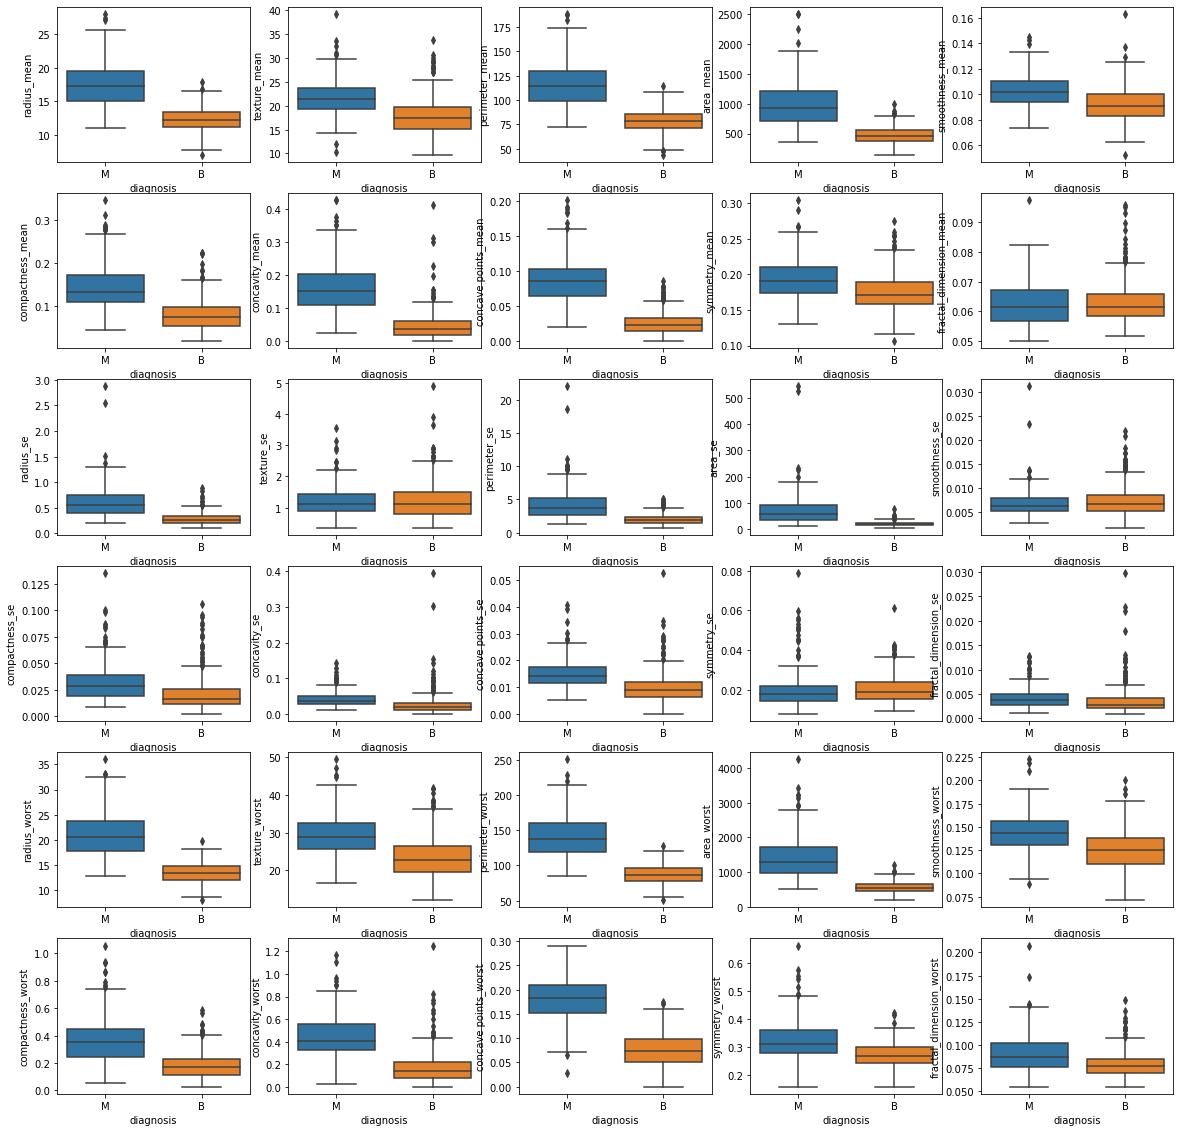

In [7]:
fig, axs = plt.subplots(nrows=6,ncols=5,figsize=(20,20))
k=1
for i in range(0,6):
    for j in range(0,5):
        sns.boxplot(x='diagnosis', y=BC.columns[k], data=BC, ax=axs[i,j])
##Pour espacer les graphes horizontalement et verticalement
        k=k+1

## Scatter Plots : 

### Means variable

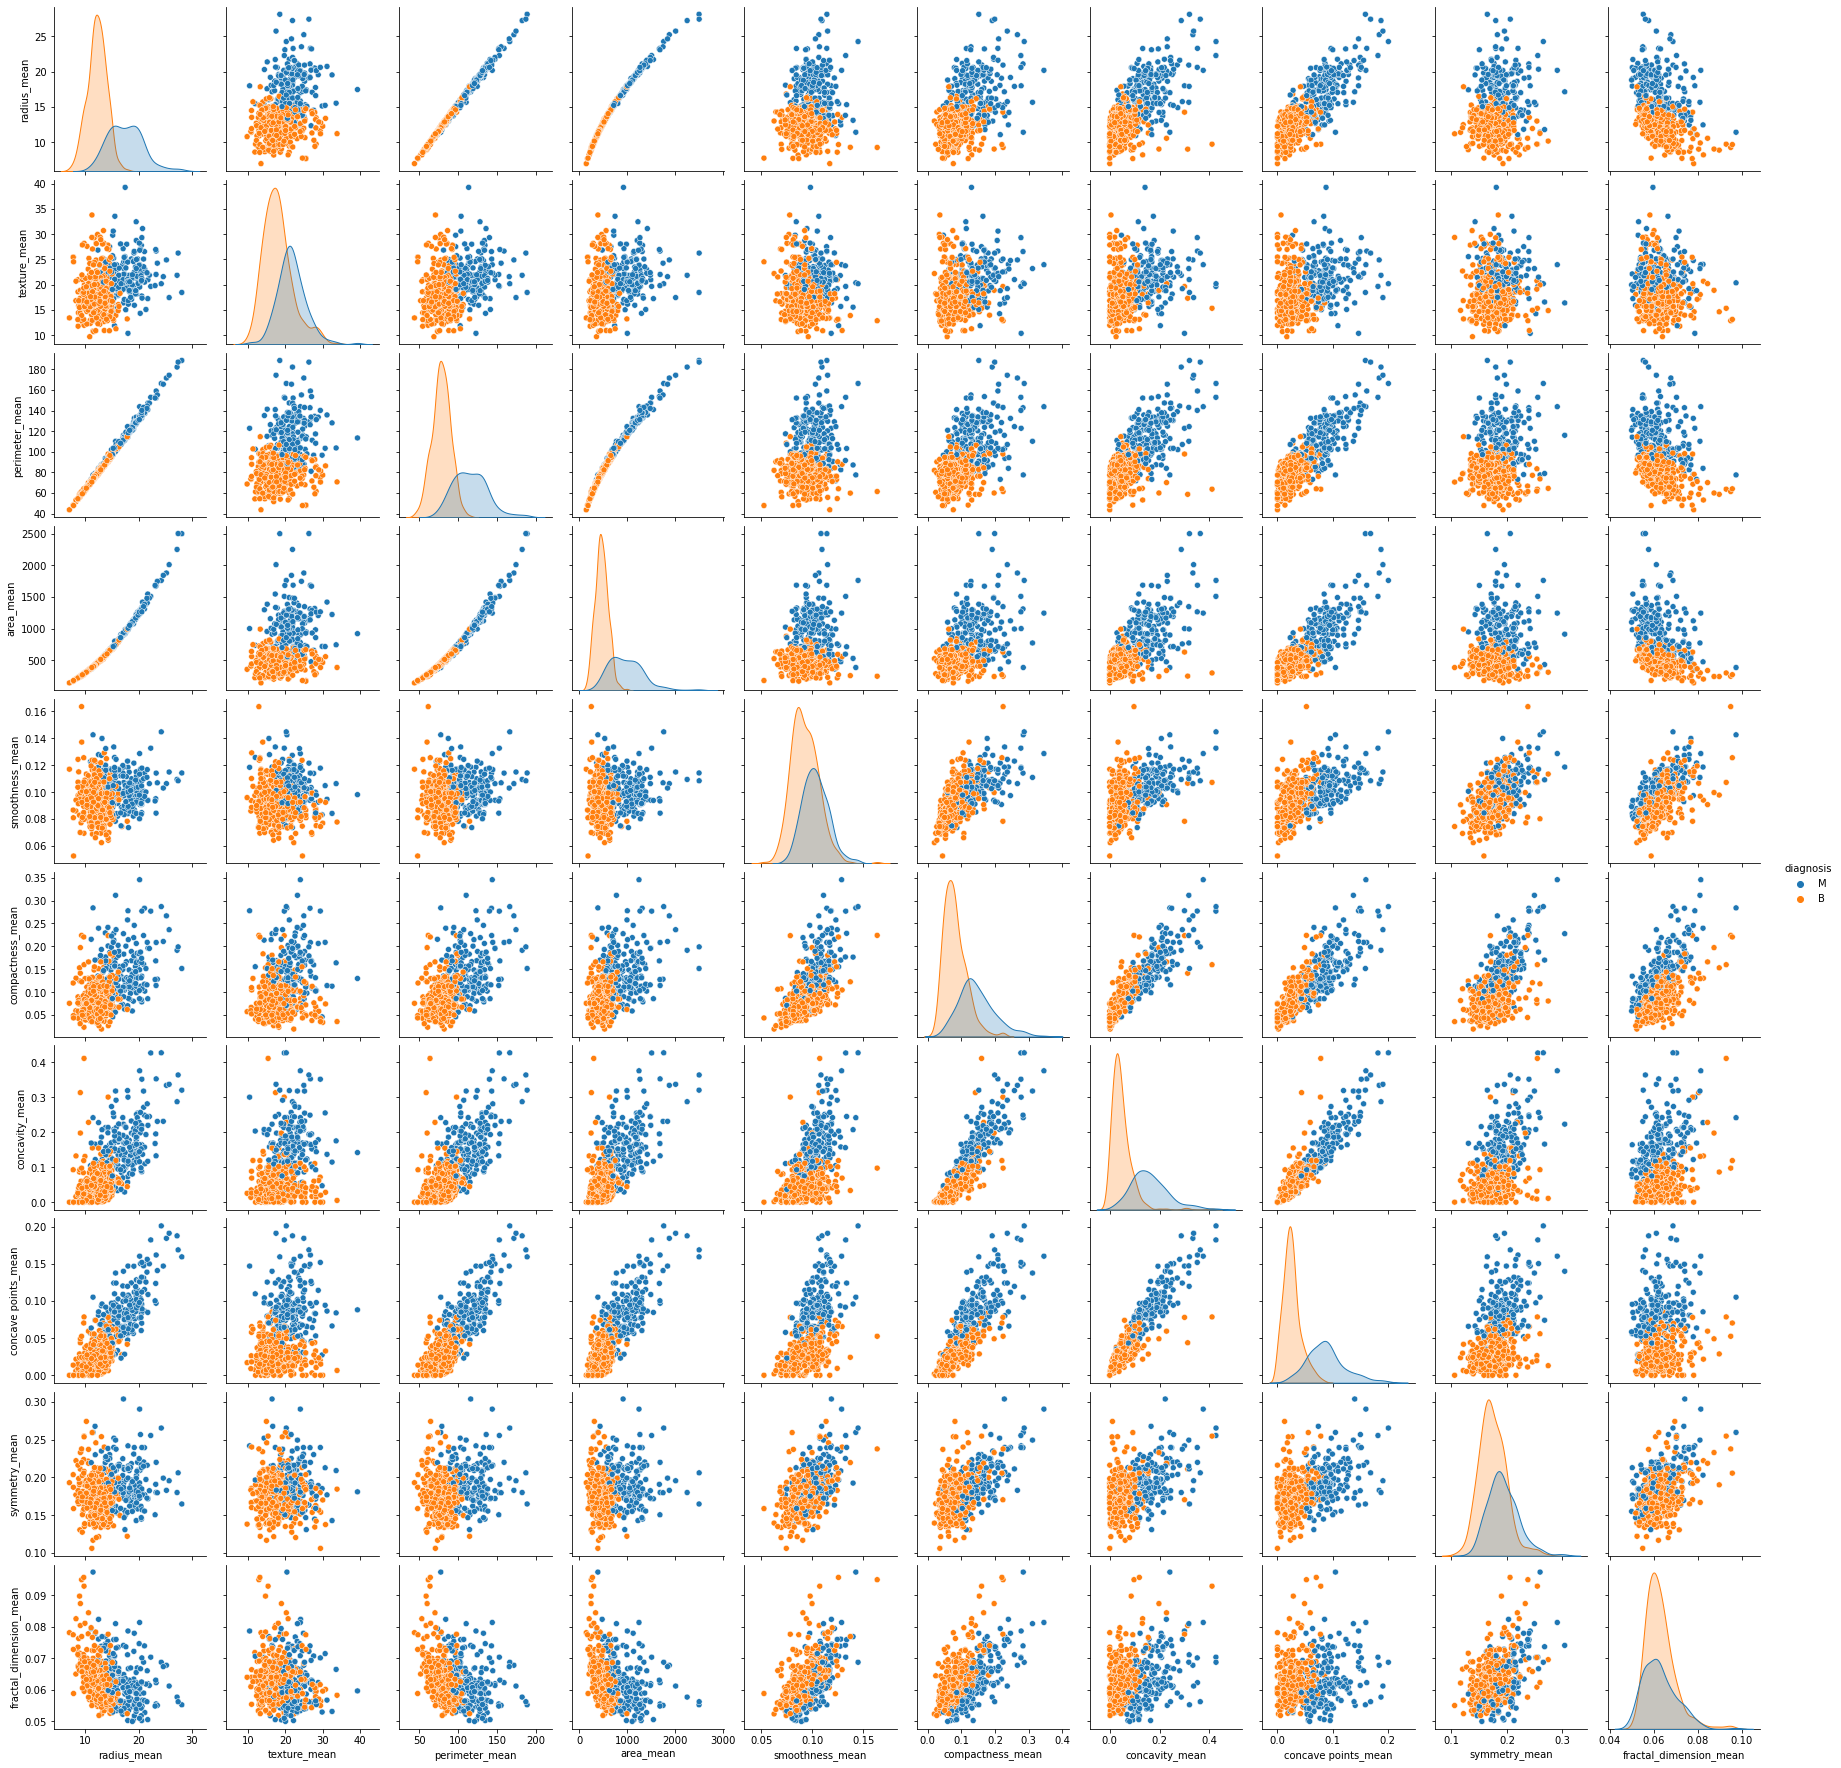

In [8]:
BC_mean=BC.iloc[:,0:11] ##On crée un dataframe avec la variable diagnosis et les variables mean
sns.pairplot(BC_mean, hue="diagnosis",diag_kind="kde")
plt.show()


### Se variable

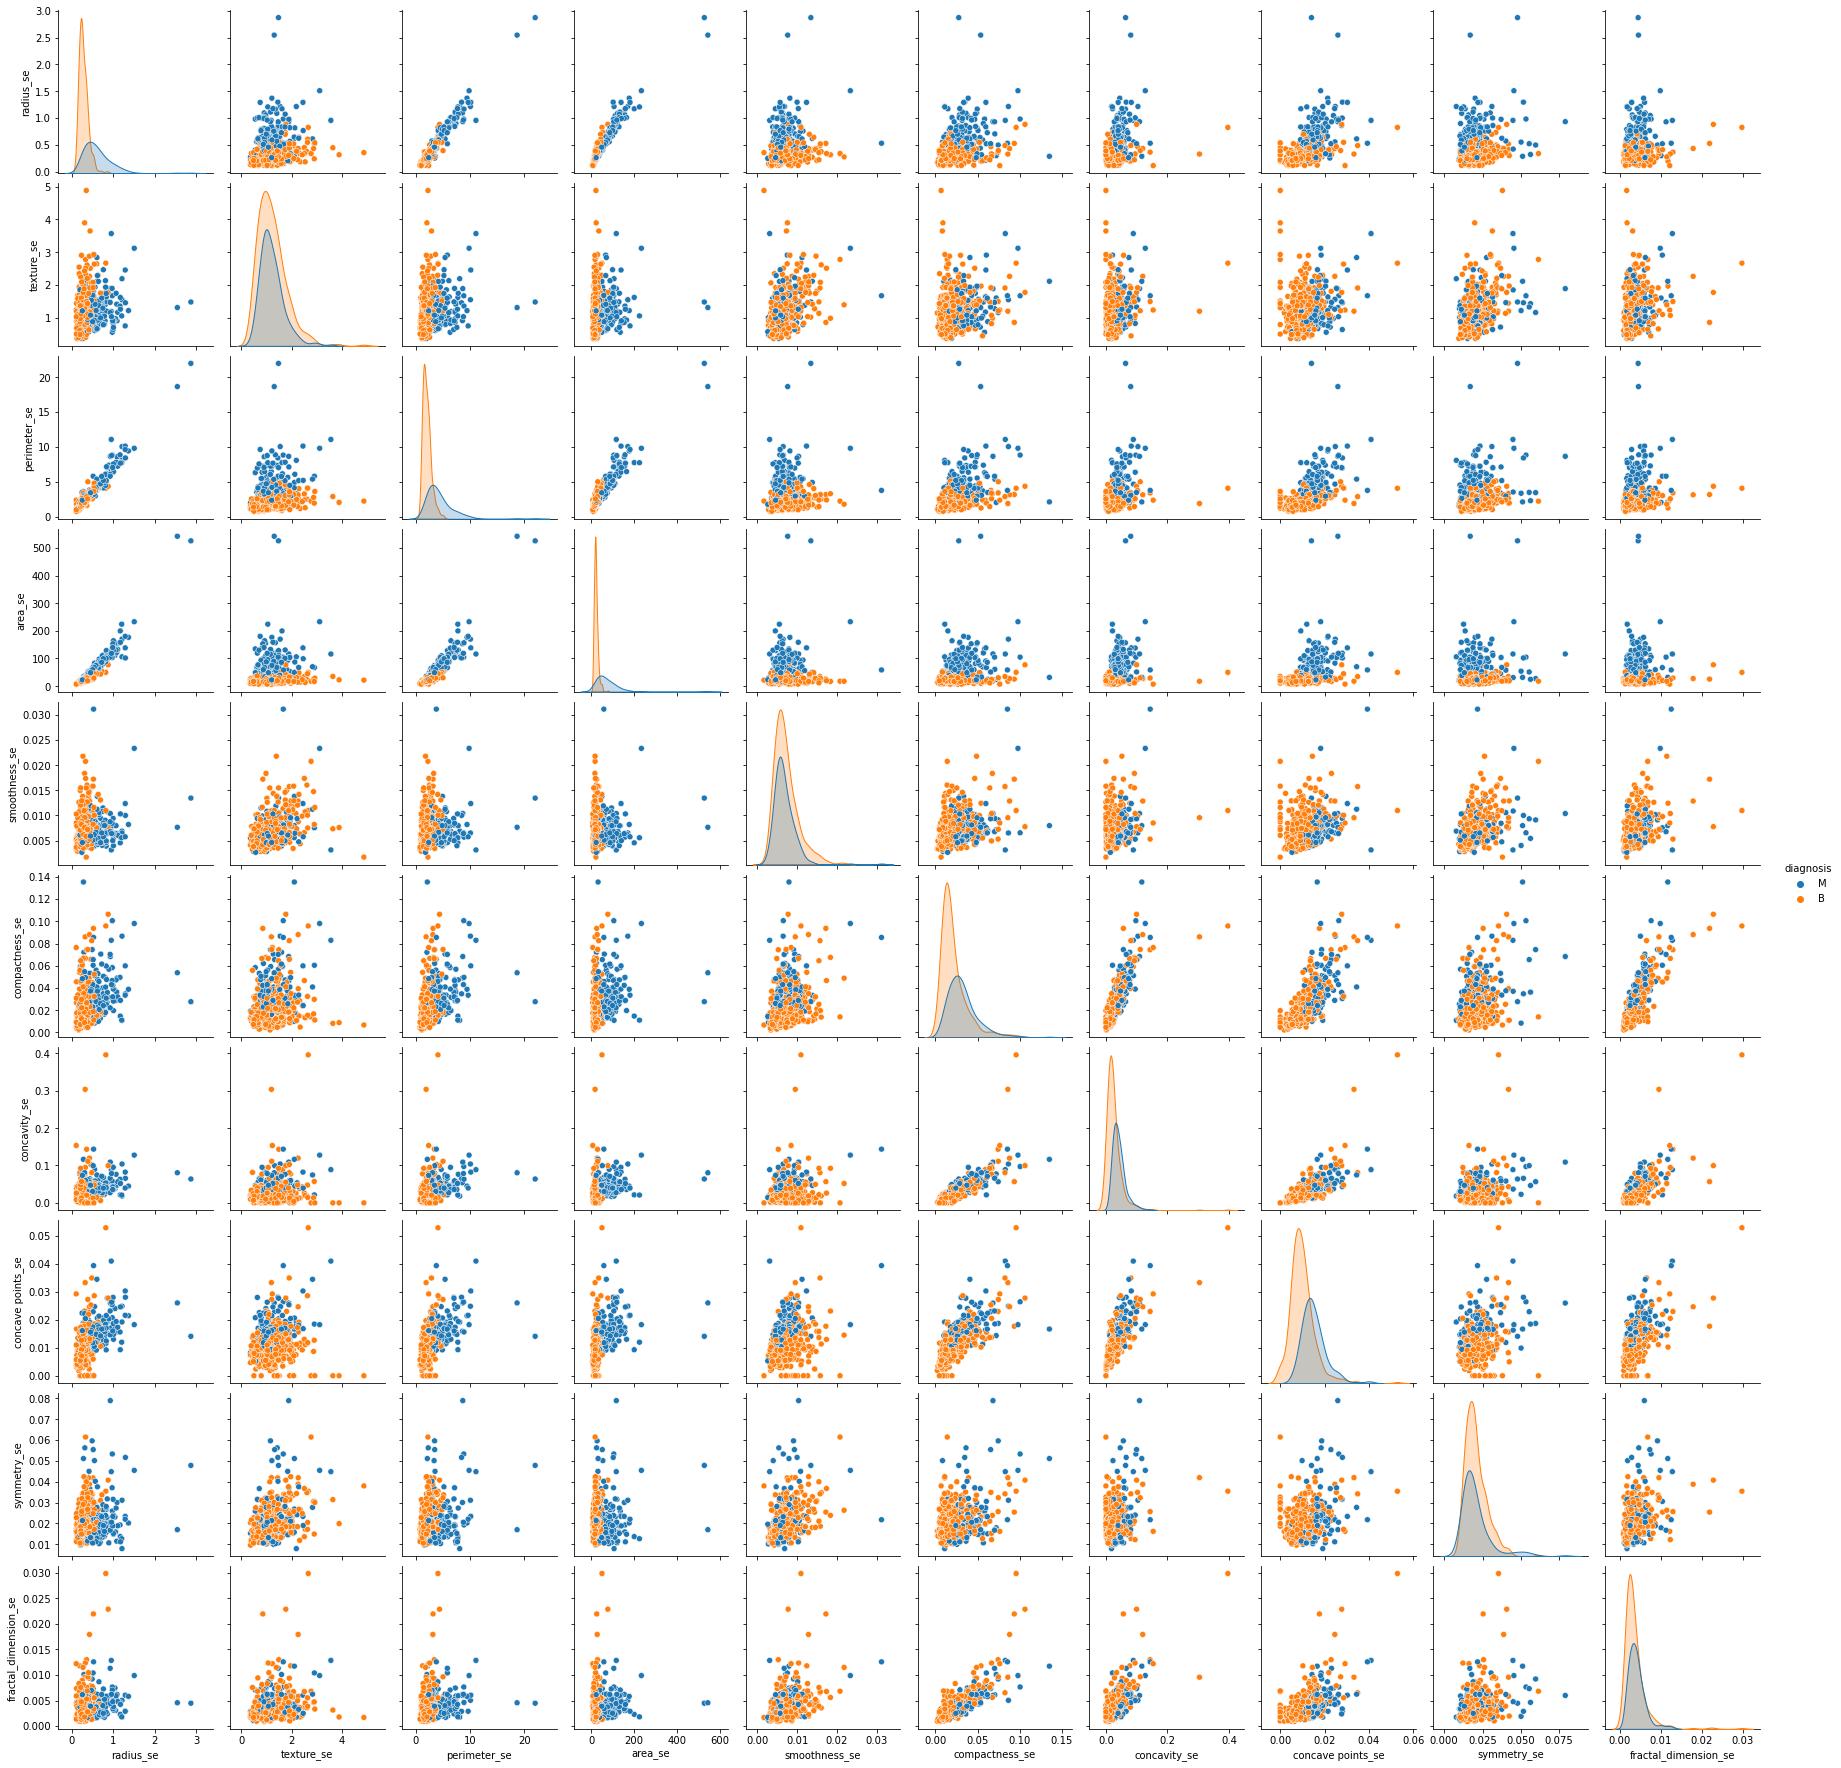

In [9]:
BC_Se=BC.iloc[:,[0,11,12,13,14,15,16,17,18,19,20]] #On crée un dataframe avec la variable diagnosis et les variables mean
sns.pairplot(BC_Se, hue="diagnosis",diag_kind="kde")
plt.show()

### Worst variable

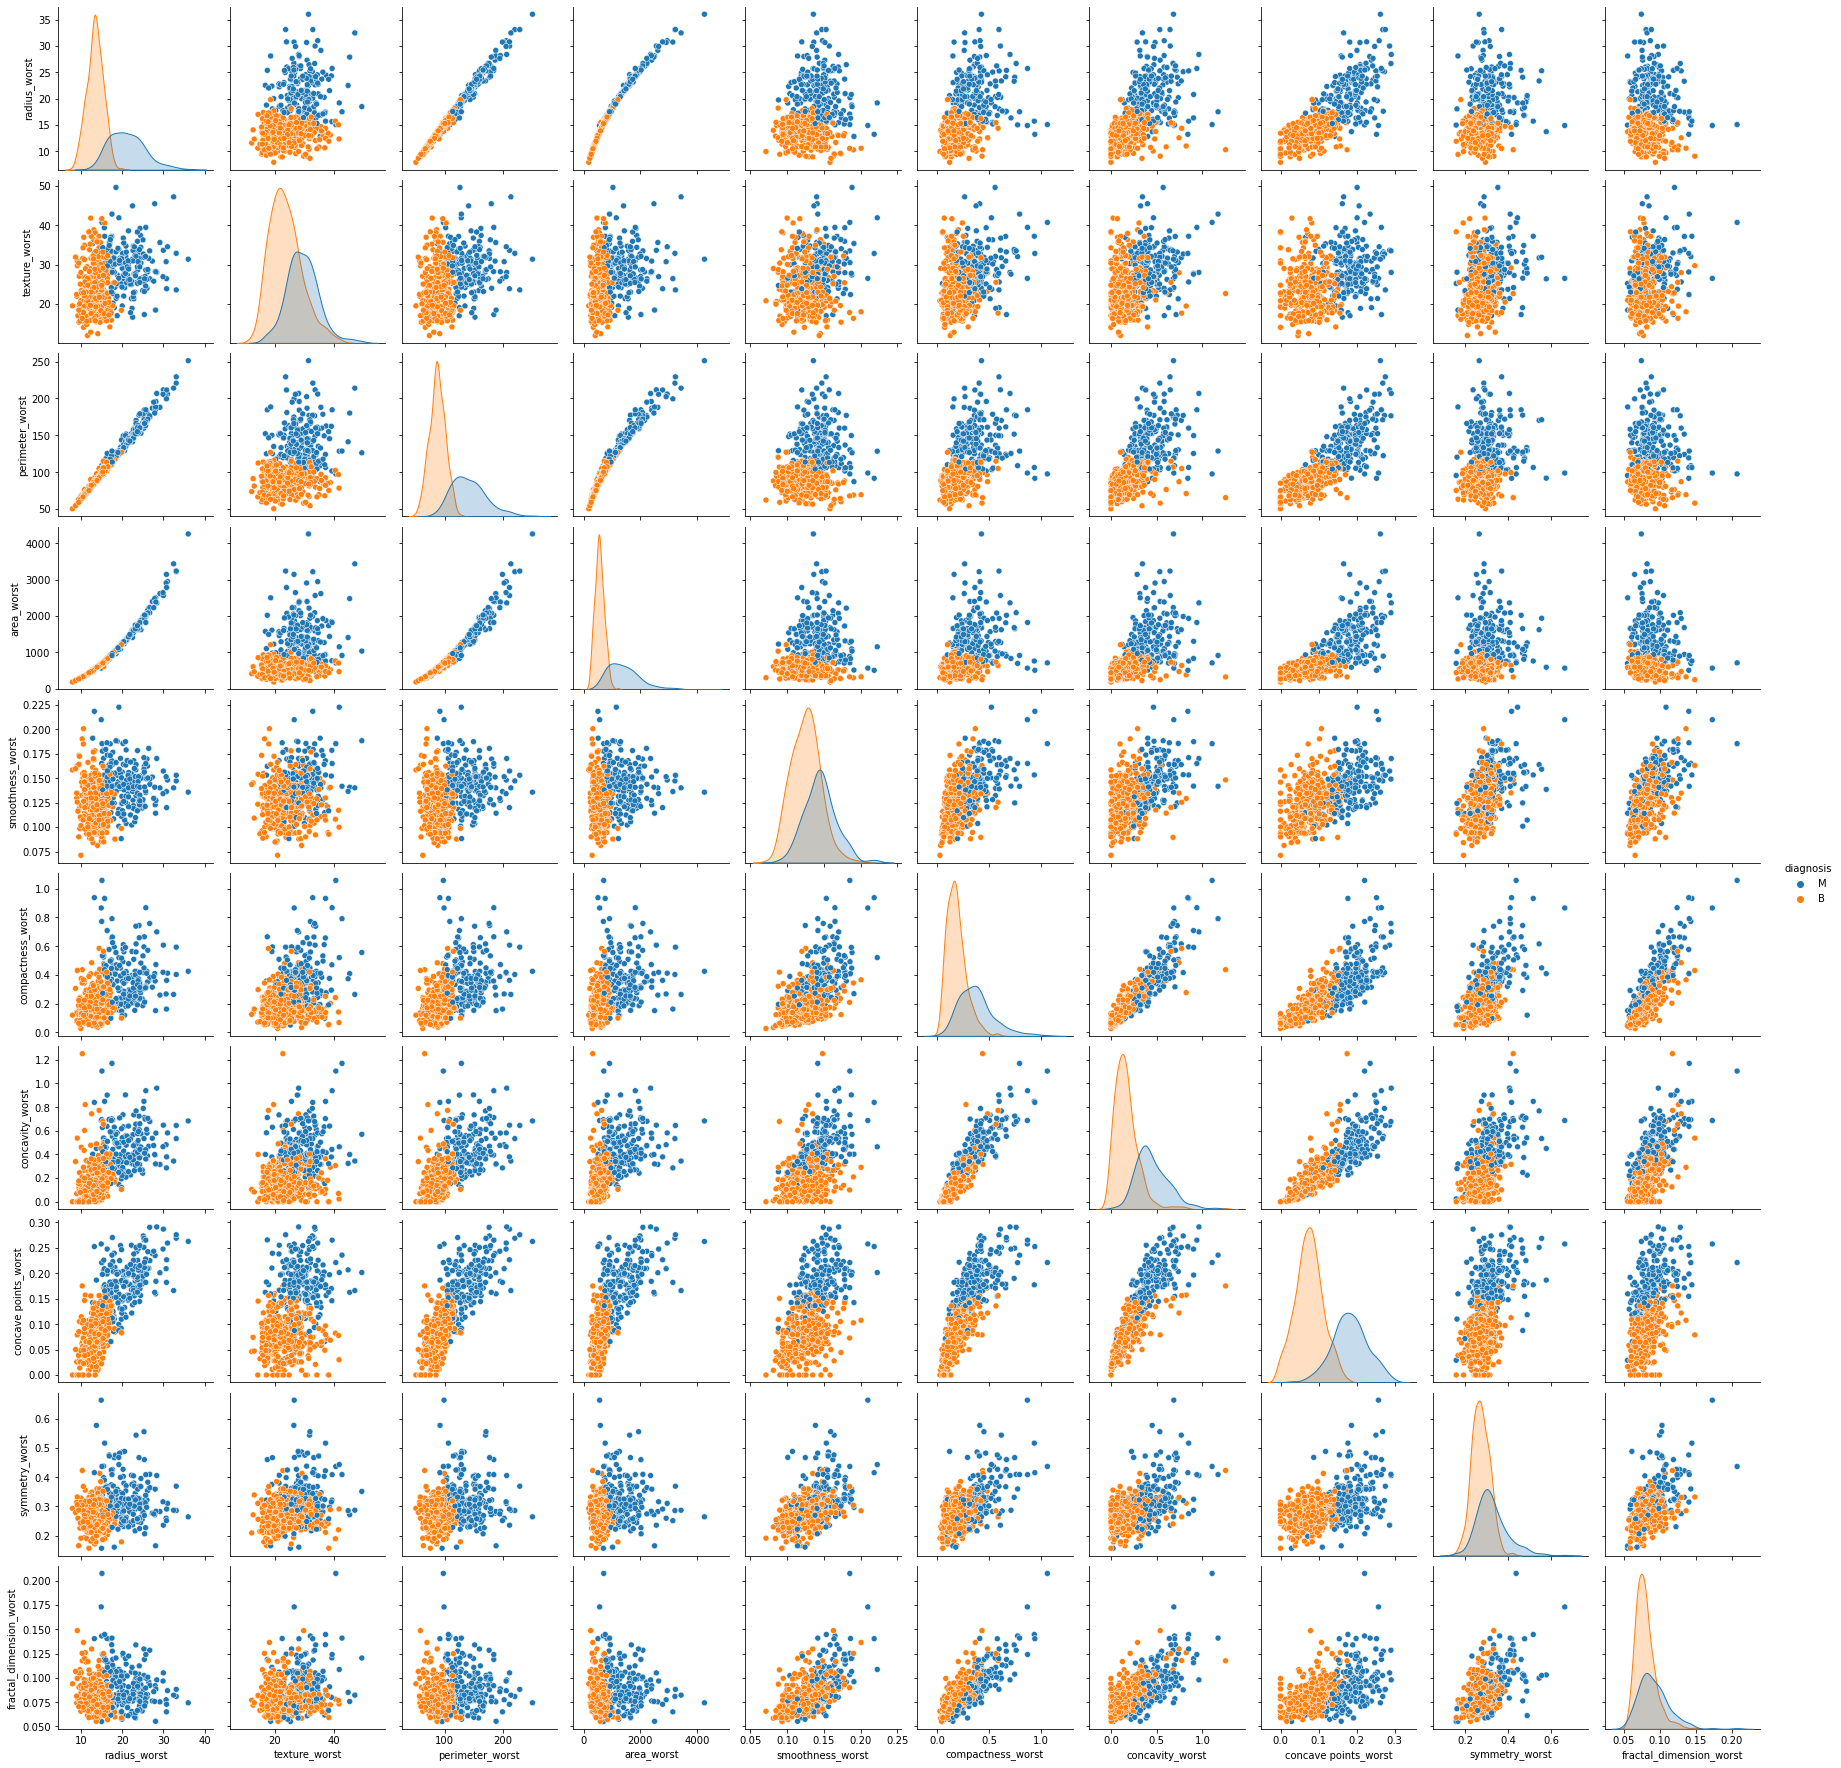

In [10]:
BC_Worst=BC.iloc[:,[0,21,22,23,24,25,26,27,28,29,30]] #On crée un data frame avec la variable diagnosis et les variables worst
sns.pairplot(BC_Worst, hue="diagnosis",diag_kind="kde")
plt.show()

# Target diagnosis binary encoding 

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(BC["diagnosis"])
BC["BinaryDiagnosis"]=le.transform(BC["diagnosis"])
BC

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   
...                       ...            ...  ...            ...   
926424                0.13890         0.1726  ...          26.40   
926682                0.09791         0.1752  ...          38.25   
926954                0.05302         0.1590  ...          34.12   
927241                0.15200         0.2397  ...          39.42   
92751                 0.00000         0.1587  ...          30.37   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0           0.16220            0.66560   
842517             158.80      1956.0           0.12380            0.18660   
84300903           152.50      1709.0           0.14440            0.42450   
84348301            98.87       567.7           0.20980            0.86630   
84358402           152.20      1575.0           0.13740            0.20500   
...                   ...         ...               ...                ...   
926424             166.10      2027.0           0.14100            0.21130   
926682             155.00      1731.0           0.11660            0.19220   
926954             126.70      1124.0           0.11390            0.30940   
927241             184.60      1821.0           0.16500            0.86810   
92751               59.16       268.6           0.08996            0.06444   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504       

# Feature selection (RFECV)

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [13]:
X=BC.iloc[:,1:31]
y=BC.iloc[:,31]
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv = 5)
#SGDClassifier : Stochastic Gradient Descent
print("Estimateur :","\n",selector.fit(X, y))
print("\n")
print("Classement des variables :","\n",selector.ranking_)
print("\n")
print("Score :","\n",selector.grid_scores_)
print(selector.n_features_)

Estimateur : 
 RFECV(cv=5, estimator=SGDClassifier(random_state=0), min_features_to_select=2)


Classement des variables : 
 [ 2  3  1  1 16 11  8 12 13 17 21 10  5  1 24 15 14 20 25 22  1  4  1  1
 19  7  6  9 18 23]


Score : 
 [0.80808881 0.69388294 0.89102624 0.89101071 0.89455054 0.82187549
 0.79206645 0.86124825 0.88219221 0.88219221 0.86289396 0.78920975
 0.77166589 0.77166589 0.77166589 0.7576308  0.7576308  0.7576308
 0.7576308  0.7576308  0.7576308  0.7576308  0.7576308  0.7576308
 0.7576308  0.7576308  0.7576308  0.7576308  0.7576308 ]
6


In [14]:
X = X.iloc[:,[3,4,14,21,23,24]] #Dataset after dimension reducing 
X

area_mean  smoothness_mean  smoothness_se  texture_worst  \
id                                                                   
842302       1001.0          0.11840       0.006399          17.33   
842517       1326.0          0.08474       0.005225          23.41   
84300903     1203.0          0.10960       0.006150          25.53   
84348301      386.1          0.14250       0.009110          26.50   
84358402     1297.0          0.10030       0.011490          16.67   
...             ...              ...            ...            ...   
926424       1479.0          0.11100       0.010300          26.40   
926682       1261.0          0.09780       0.005769          38.25   
926954        858.1          0.08455       0.005903          34.12   
927241       1265.0          0.11780       0.006522          39.42   
92751         181.0          0.05263       0.007189          30.37   

          area_worst  smoothness_worst  
id                                      
842302        2019.0           0.16220  
842517        1956.0           0.12380  
84300903      1709.0           0.14440  
84348301       567.7           0.20980  
84358402      1575.0           0.13740  
...              ...               ...  
926424        2027.0           0.14100  
926682        1731.0           0.11660  
926954        1124.0           0.11390  
927241        1821.0           0.16500  
92751          268.6           0.08996  

[569 rows x 6 columns]

# Dividing samples Train/Test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# Machine Learning algorithms

## KNN

In [16]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
              'weights':['uniform','distance']}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score,# score à optimiser
    return_train_score=True
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ))
clf.best_params_



Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 11, 'weights': 'distance'}
Résultats de la validation croisée :
accuracy = 0.908 (+/-0.064) for {'n_neighbors': 1, 'weights': 'uniform'}
accuracy = 0.908 (+/-0.064) for {'n_neighbors': 1, 'weights': 'distance'}
accuracy = 0.918 (+/-0.067) for {'n_neighbors': 3, 'weights': 'uniform'}
accuracy = 0.920 (+/-0.048) for {'n_neighbors': 3, 'weights': 'distance'}
accuracy = 0.925 (+/-0.068) for {'n_neighbors': 5, 'weights': 'uniform'}
accuracy = 0.927 (+/-0.072) for {'n_neighbors': 5, 'weights': 'distance'}
accuracy = 0.932 (+/-0.055) for {'n_neighbors': 7, 'weights': 'uniform'}
accuracy = 0.929 (+/-0.056) for {'n_neighbors': 7, 'weights': 'distance'}
accuracy = 0.934 (+/-0.049) for {'n_neighbors': 9, 'weights': 'uniform'}
accuracy = 0.934 (+/-0.055) for {'n_neighbors': 9, 'weights': 'distance'}
accuracy = 0.932 (+/-0.048) for {'n_neighbors': 11, 'weights': 'uniform'}
accuracy = 0.937 (+/-0.049) for {'n_neighbors': 11, 'w

{'n_neighbors': 11, 'weights': 'distance'}

Confusion and classification report :

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.best_estimator_.predict(X_test)

<AxesSubplot:>

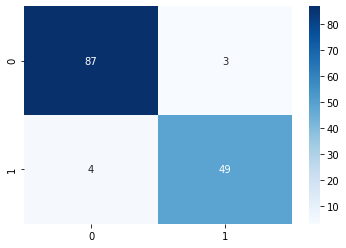

In [18]:
Confusion_Mat = confusion_matrix(y_test, y_pred)
sns.heatmap(Confusion_Mat, annot=True,cmap='Blues')

Courbe ROC :

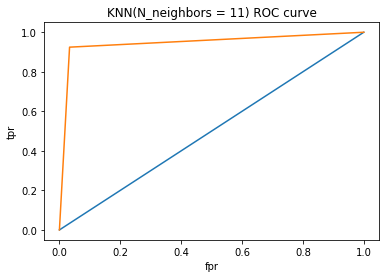

In [19]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN(N_neighbors = 11) ROC curve')
plt.show()

##  Logistic regression

In [20]:
grid={"C":np.logspace(-3,3,7),'penalty':['l1','l2']}
logreg=LogisticRegression(solver='liblinear',max_iter = 200)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
logreg_cv.best_params_
logreg_cv.best_score_

0.9602990033222591

In [21]:
y_pred = clf.best_estimator_.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9455974842767296


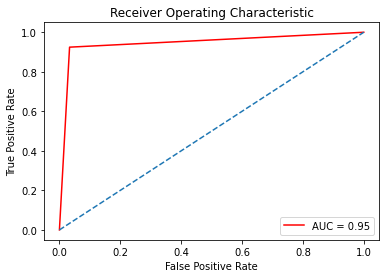

In [22]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [26]:
grid = {'C':np.logspace(-3,3,7),'gamma':np.logspace(-3,3,7),'kernel':['linear','rbf']}
SVM = SVC()
SVM_Gridsearch = GridSearchCV(SVM,grid,cv=10)
SVM_Gridsearch.fit(X_train,y_train)
SVM_Gridsearch.best_params_
SVM_Gridsearch.best_scores_

AttributeError: 'GridSearchCV' object has no attribute 'best_scores_'

In [ ]:
SVM_Gridsearch.best_params_